<a href="https://colab.research.google.com/github/Anubhavsinghchauhan/Churn_predict_for_car_service_provider_Anubhav/blob/main/Anubhav_porter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
!gdown 1kkgBGldeswHBgVKEJiqqG7VZvqZNMc-5

Downloading...
From: https://drive.google.com/uc?id=1kkgBGldeswHBgVKEJiqqG7VZvqZNMc-5
To: /content/data_2.csv
100% 15.7M/15.7M [00:00<00:00, 51.0MB/s]


In [16]:
df=pd.read_csv("data_2.csv")

In [18]:

df

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175772,1.0,2015-02-17 00:19:41,2015-02-17 01:02:41,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,331.0
175773,1.0,2015-02-13 00:01:59,2015-02-13 01:03:59,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,915.0
175774,1.0,2015-01-24 04:46:08,2015-01-24 05:32:08,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,795.0
175775,1.0,2015-02-01 18:18:15,2015-02-01 19:03:15,58,1.0,1,1175,1,535,535,7.0,7.0,12.0,384.0


In [19]:
df.shape

(175777, 14)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   created_at                                    175777 non-null  object 
 2   actual_delivery_time                          175777 non-null  object 
 3   store_primary_category                        175777 non-null  int64  
 4   order_protocol                                175777 non-null  float64
 5   total_items                                   175777 non-null  int64  
 6   subtotal                                      175777 non-null  int64  
 7   num_distinct_items                            175777 non-null  int64  
 8   min_item_price                                175777 non-null  int64  
 9   max_item_price                                17

In [20]:
df.isna().sum()

,0
market_id,0
created_at,0
actual_delivery_time,0
store_primary_category,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0
max_item_price,0


no null value

In [21]:
df

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175772,1.0,2015-02-17 00:19:41,2015-02-17 01:02:41,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,331.0
175773,1.0,2015-02-13 00:01:59,2015-02-13 01:03:59,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,915.0
175774,1.0,2015-01-24 04:46:08,2015-01-24 05:32:08,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,795.0
175775,1.0,2015-02-01 18:18:15,2015-02-01 19:03:15,58,1.0,1,1175,1,535,535,7.0,7.0,12.0,384.0


In [23]:
df['market_id'].value_counts()

,count
market_id,
2.0,53469
4.0,46222
1.0,37115
3.0,21075
5.0,17258
6.0,638


only 6 distinct market id's

In [28]:
df['created_at']=pd.to_datetime(df['created_at'])

In [29]:
df['actual_delivery_time']=pd.to_datetime(df['actual_delivery_time'])

In [30]:
df['created_at']

,created_at
0,2015-02-06 22:24:17
1,2015-02-10 21:49:25
2,2015-02-16 00:11:35
3,2015-02-12 03:36:46
4,2015-01-27 02:12:36
...,...
175772,2015-02-17 00:19:41
175773,2015-02-13 00:01:59
175774,2015-01-24 04:46:08
175775,2015-02-01 18:18:15


In [31]:
df['hour']=df['created_at'].dt.hour

In [32]:
df['day']=df['created_at'].dt.day

In [33]:
df['week_number']=df['created_at'].dt.dayofweek

In [36]:
df['month']=df['created_at'].dt.month

In [37]:
df

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,hour,day,week_number,month
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,22,6,4,2
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,21,10,1,2
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0,16,0,2
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,3,12,3,2
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,2,27,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175772,1.0,2015-02-17 00:19:41,2015-02-17 01:02:41,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,331.0,0,17,1,2
175773,1.0,2015-02-13 00:01:59,2015-02-13 01:03:59,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,915.0,0,13,4,2
175774,1.0,2015-01-24 04:46:08,2015-01-24 05:32:08,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,795.0,4,24,5,1
175775,1.0,2015-02-01 18:18:15,2015-02-01 19:03:15,58,1.0,1,1175,1,535,535,7.0,7.0,12.0,384.0,18,1,6,2


In [38]:
df['delivery_time_taken']=df['actual_delivery_time']-df['created_at']

In [40]:
df['delivery_time_taken']=pd.to_timedelta(df['delivery_time_taken'])

In [42]:
df['delivery_time_taken']=df['delivery_time_taken']/pd.Timedelta('60s')

In [43]:
df

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,hour,day,week_number,month,delivery_time_taken
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,22,6,4,2,47.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,21,10,1,2,44.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0,16,0,2,55.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,3,12,3,2,59.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,2,27,1,1,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175772,1.0,2015-02-17 00:19:41,2015-02-17 01:02:41,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,331.0,0,17,1,2,43.0
175773,1.0,2015-02-13 00:01:59,2015-02-13 01:03:59,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,915.0,0,13,4,2,62.0
175774,1.0,2015-01-24 04:46:08,2015-01-24 05:32:08,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,795.0,4,24,5,1,46.0
175775,1.0,2015-02-01 18:18:15,2015-02-01 19:03:15,58,1.0,1,1175,1,535,535,7.0,7.0,12.0,384.0,18,1,6,2,45.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 19 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     175777 non-null  float64       
 1   created_at                                    175777 non-null  datetime64[ns]
 2   actual_delivery_time                          175777 non-null  datetime64[ns]
 3   store_primary_category                        175777 non-null  int64         
 4   order_protocol                                175777 non-null  float64       
 5   total_items                                   175777 non-null  int64         
 6   subtotal                                      175777 non-null  int64         
 7   num_distinct_items                            175777 non-null  int64         
 8   min_item_price                                175777 n

In [47]:
df['store_primary_category'].value_counts()

,count
store_primary_category,
4,18183
55,15745
46,15586
13,9915
58,8995
...,...
1,10
43,9
8,2


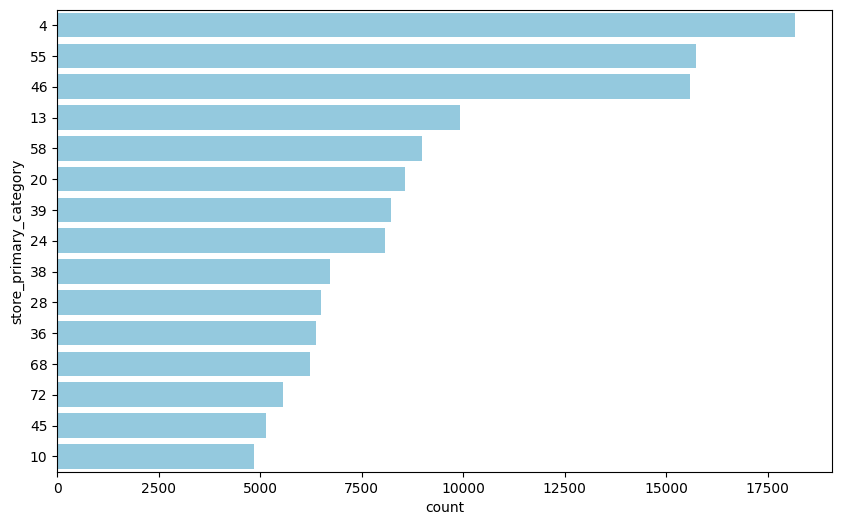

In [63]:
top15_items = df['store_primary_category'].value_counts().nlargest(15).index

df_top15 = df[df['store_primary_category'].isin(top15_items)]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top15, y='store_primary_category', color='skyblue',
              order=top15_items)


plt.show()

In [48]:
df['store_primary_category'].nunique()

73

total 73 different category for the restaurant, with most order from 4,55,46 and least from3,21,8.

<Axes: xlabel='count', ylabel='order_protocol'>

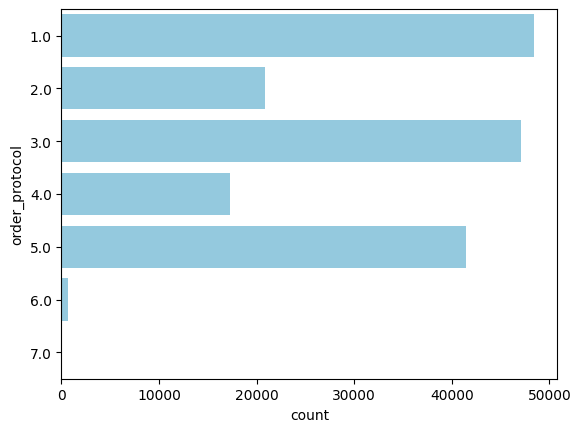

In [62]:
sns.countplot(data=df, y='order_protocol', color='skyblue',
              )

In [50]:
df['order_protocol'].value_counts()

,count
order_protocol,
1.0,48404
3.0,47125
5.0,41415
2.0,20890
4.0,17246
6.0,678
7.0,19


order_protocol is integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc). where 1 way is the most popular way of ordering.

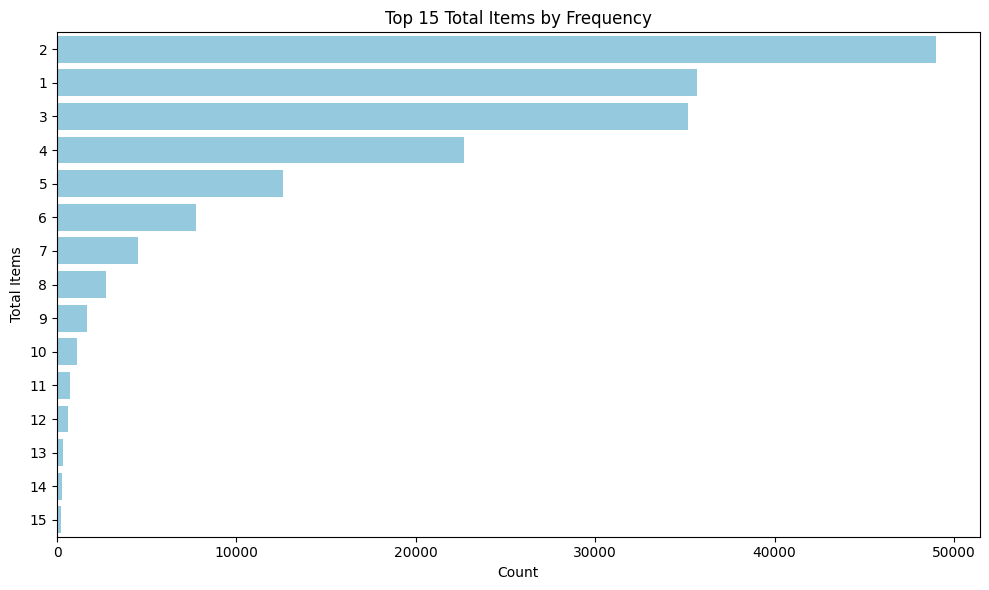

In [60]:
top15_items = df['total_items'].value_counts().nlargest(15).index

df_top15 = df[df['total_items'].isin(top15_items)]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top15, y='total_items', color='skyblue',
              order=top15_items)

plt.title('Top 15 Total Items by Frequency')
plt.xlabel('Count')
plt.ylabel('Total Items')
plt.tight_layout()
plt.show()

In [54]:
df['total_items'].value_counts()

,count
total_items,
2,48979
1,35647
3,35144
4,22659
5,12586
6,7765
7,4511
8,2708
9,1668


2,1,3 are the most of time deliver item counts.

In [64]:
df['subtotal'].describe()

,subtotal
count,175777.000000
mean,2697.111147
std,1828.554893
min,0.000000
25%,1412.000000
50%,2224.000000
75%,3410.000000
max,26800.000000


Avg order value in porter is 2697 with std. of 1828 and max order value is 26800 with total order count as 175777.

In [66]:
df['num_distinct_items'].value_counts()

,count
num_distinct_items,
2,52718
1,43993
3,37435
4,20780
5,10537
6,5065
7,2611
8,1252
9,650


In [67]:
df['total_onshift_dashers'].value_counts()

,count
total_onshift_dashers,
0.0,3541
15.0,2831
18.0,2830
21.0,2758
19.0,2744
...,...
164.0,1
159.0,1
169.0,1


In [68]:
df['total_onshift_dashers'].describe()

,total_onshift_dashers
count,175777.000000
mean,44.918664
std,34.544724
min,-4.000000
25%,17.000000
50%,37.000000
75%,66.000000
max,171.000000


In [69]:
df[df['total_onshift_dashers']==-4]

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,hour,day,week_number,month,delivery_time_taken
159437,1.0,2015-02-11 19:52:36,2015-02-11 20:46:36,20,1.0,2,1934,2,1006,1024,-4.0,7.0,3.0,669.0,19,11,2,2,54.0


maybe this is a typo. where total_onshift_dashers=-4

In [70]:
df['total_busy_dashers'].value_counts()

,count
total_busy_dashers,
0.0,4066
10.0,3017
13.0,2938
18.0,2926
6.0,2914
...,...
-3.0,2
152.0,2
154.0,1


In [72]:
df['total_outstanding_orders'].value_counts()

,count
total_outstanding_orders,
0.0,4003
9.0,2650
10.0,2598
8.0,2589
6.0,2556
...,...
264.0,1
283.0,1
245.0,1


In [73]:
df['estimated_store_to_consumer_driving_duration'].describe()

,estimated_store_to_consumer_driving_duration
count,175777.000000
mean,546.077240
std,218.717798
min,0.000000
25%,384.000000
50%,544.000000
75%,703.000000
max,2088.000000


546 is the approx. mean time to compelete the order.

In [75]:
df['hour'].value_counts()

,count
hour,
2,32896
1,25722
3,23693
20,13883
4,13248
19,12083
0,11464
21,10219
22,7875


<Axes: xlabel='count', ylabel='hour'>

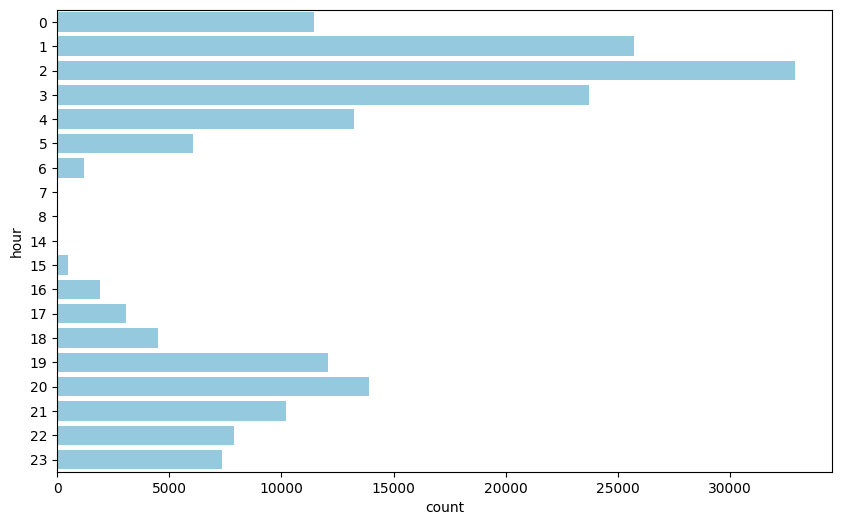

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='hour', color='skyblue',
              )

Most order are done at 2 and least at 3.

<Axes: xlabel='count', ylabel='day'>

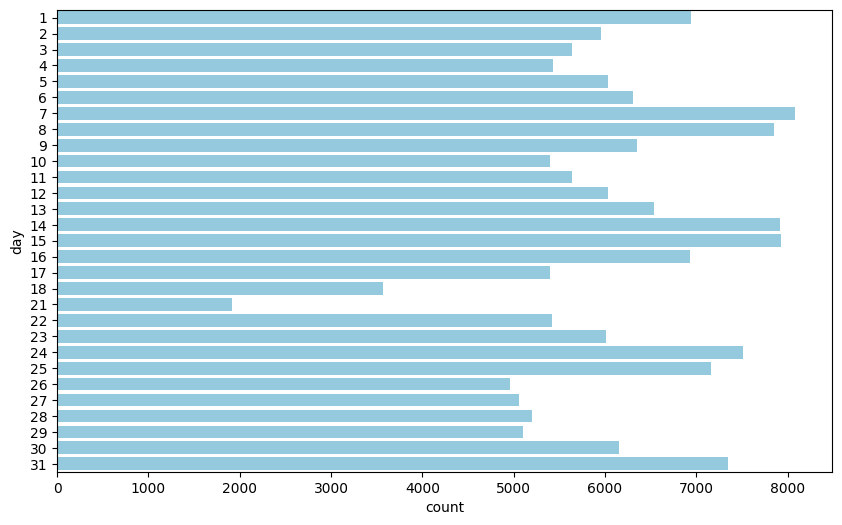

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='day', color='skyblue',
              )

<Axes: xlabel='count', ylabel='week_number'>

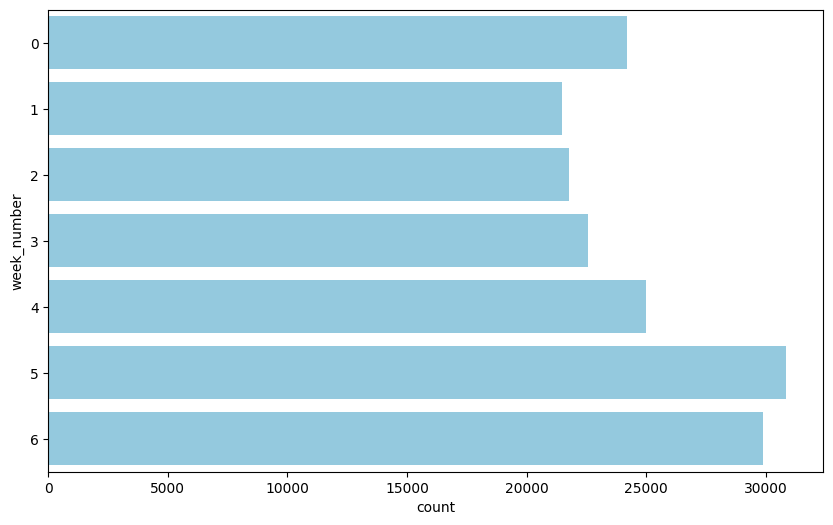

In [79]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='week_number', color='skyblue',
              )

toward the end of week order increase but not much.

<Axes: xlabel='count', ylabel='month'>

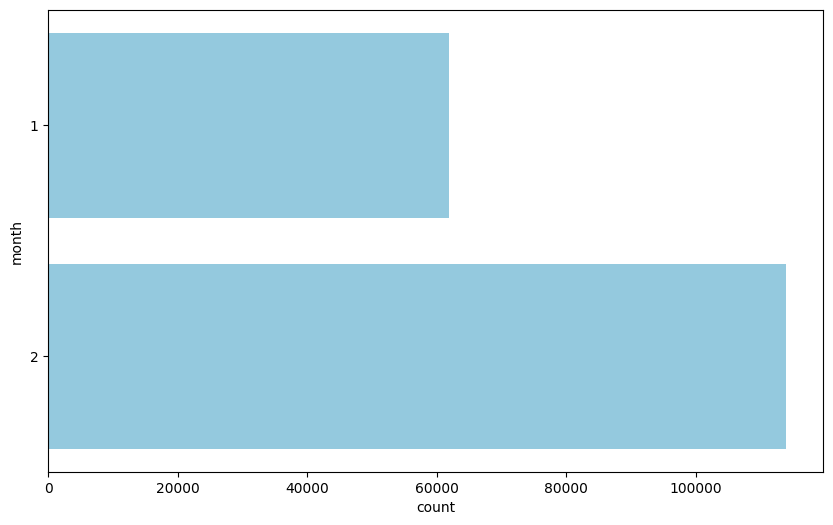

In [80]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='month', color='skyblue',
              )

only two month data so in feb more orders are there.

In [81]:
df['delivery_time_taken'].describe()

,delivery_time_taken
count,175777.000000
mean,46.203013
std,9.327424
min,32.000000
25%,39.000000
50%,45.000000
75%,52.000000
max,110.000000


avg delivery time is 46 min.

<Axes: xlabel='delivery_time_taken', ylabel='hour'>

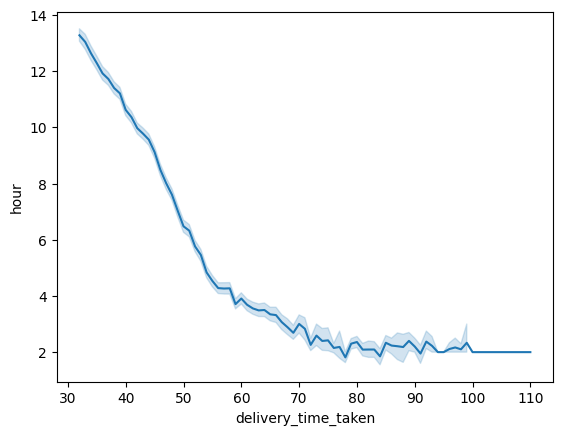

In [83]:
sns.lineplot(data=df,x='delivery_time_taken',y='hour')

more time taken from hour 2,3,4

In [74]:
df

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,hour,day,week_number,month,delivery_time_taken
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,22,6,4,2,47.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,21,10,1,2,44.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0,16,0,2,55.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,3,12,3,2,59.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,2,27,1,1,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175772,1.0,2015-02-17 00:19:41,2015-02-17 01:02:41,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,331.0,0,17,1,2,43.0
175773,1.0,2015-02-13 00:01:59,2015-02-13 01:03:59,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,915.0,0,13,4,2,62.0
175774,1.0,2015-01-24 04:46:08,2015-01-24 05:32:08,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,795.0,4,24,5,1,46.0
175775,1.0,2015-02-01 18:18:15,2015-02-01 19:03:15,58,1.0,1,1175,1,535,535,7.0,7.0,12.0,384.0,18,1,6,2,45.0


In [87]:
df.drop(columns=['created_at','actual_delivery_time'],inplace=True)

let's check for outlier using lof

In [88]:
from sklearn.neighbors import LocalOutlierFactor

In [89]:
model1 = LocalOutlierFactor()
df['score'] = model1.fit_predict(df)


In [91]:
df1=df[df['score']==1]

In [93]:
df1.shape,df.shape

((174984, 18), (175777, 18))

In [95]:
df1

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,hour,day,week_number,month,delivery_time_taken,score
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,22,6,4,2,47.0,1
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,21,10,1,2,44.0,1
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0,16,0,2,55.0,1
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,3,12,3,2,59.0,1
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,2,27,1,1,46.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175772,1.0,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,331.0,0,17,1,2,43.0,1
175773,1.0,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,915.0,0,13,4,2,62.0,1
175774,1.0,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,795.0,4,24,5,1,46.0,1
175775,1.0,58,1.0,1,1175,1,535,535,7.0,7.0,12.0,384.0,18,1,6,2,45.0,1


In [96]:
df1

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,hour,day,week_number,month,delivery_time_taken,score
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,22,6,4,2,47.0,1
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,21,10,1,2,44.0,1
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0,16,0,2,55.0,1
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,3,12,3,2,59.0,1
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,2,27,1,1,46.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175772,1.0,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,331.0,0,17,1,2,43.0,1
175773,1.0,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,915.0,0,13,4,2,62.0,1
175774,1.0,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,795.0,4,24,5,1,46.0,1
175775,1.0,58,1.0,1,1175,1,535,535,7.0,7.0,12.0,384.0,18,1,6,2,45.0,1


deleting column which add no info to model.

In [99]:
df1.drop(columns=['score'],inplace=True)

<ipython-input-99-2132722760>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['score'],inplace=True)


In [100]:
df1

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,hour,day,week_number,month,delivery_time_taken
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,22,6,4,2,47.0
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,21,10,1,2,44.0
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0,16,0,2,55.0
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,3,12,3,2,59.0
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,2,27,1,1,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175772,1.0,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,331.0,0,17,1,2,43.0
175773,1.0,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,915.0,0,13,4,2,62.0
175774,1.0,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,795.0,4,24,5,1,46.0
175775,1.0,58,1.0,1,1175,1,535,535,7.0,7.0,12.0,384.0,18,1,6,2,45.0


In [101]:
x=df1.drop(columns=['delivery_time_taken'])

In [102]:
y=df1['delivery_time_taken']

In [103]:
x.shape,y.shape

((174984, 16), (174984,))

In [104]:
x

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,hour,day,week_number,month
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,22,6,4,2
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,21,10,1,2
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0,16,0,2
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,3,12,3,2
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,2,27,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175772,1.0,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,331.0,0,17,1,2
175773,1.0,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,915.0,0,13,4,2
175774,1.0,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,795.0,4,24,5,1
175775,1.0,58,1.0,1,1175,1,535,535,7.0,7.0,12.0,384.0,18,1,6,2


In [105]:
y

,delivery_time_taken
0,47.0
1,44.0
2,55.0
3,59.0
4,46.0
...,...
175772,43.0
175773,62.0
175774,46.0
175775,45.0


In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
scaler=StandardScaler()

In [108]:
x_sc=scaler.fit_transform(x)

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.2,  random_state=42)

In [111]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((139987, 16), (34997, 16), (139987,), (34997,))

In [119]:
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU


added 16 layer as input size(feature) are 16 with activation as relu and ouput layer as linear as it is a linear problem with only 1 dense neuron.

In [151]:
model1=Sequential()
model1.add(Dense(16,  kernel_initializer='normal', activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(1, activation='linear'))

let's use adam optimizer which is best optimer and it uses Momentum,RMSProp-like,Bias correction
Adam is a robust, general-purpose optimizer that converges faster and performs better without much tuning


Why ReLU (Rectified Linear Unit)?

Defined as f(x) = max(0, x)

Introduces non-linearity without vanishing gradients (unlike sigmoid or tanh).

Computationally efficient—faster training and easy to implement.

Helps the model learn complex patterns by passing only positive values.

I used linear activation in the output layer, which is the correct choice because this is a regression problem (predicting delivery_time_taken as a continuous value).

In [153]:
from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=0.01)
model1.compile(loss='mse', optimizer=adam, metrics=['mse','mae'])
history=model1.fit(x_train, y_train, epochs=30, batch_size=512, verbose=1, validation_split=0.2)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 497.2776 - mae: 14.7835 - mse: 497.2776 - val_loss: 9.5466 - val_mae: 2.3414 - val_mse: 9.5466
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 7.5940 - mae: 2.0527 - mse: 7.5940 - val_loss: 4.1983 - val_mae: 1.4663 - val_mse: 4.1983
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 3.7470 - mae: 1.3954 - mse: 3.7470 - val_loss: 2.8540 - val_mae: 1.1848 - val_mse: 2.8540
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - loss: 2.5211 - mae: 1.1402 - mse: 2.5211 - val_loss: 1.8691 - val_mae: 0.9622 - val_mse: 1.8691
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 1.7266 - mae: 0.9346 - mse: 1.7266 - val_loss: 1.4069 - val_mae: 0.8361 - val_mse: 1.4069
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - loss: 1.3375 - mae: 0.8173 - mse: 1.3375 - val_loss: 1.1673 - val_mae: 0.7601 - val_mse: 1.1673
Epoch 7/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - loss: 1.0866 - mae: 0.7318 - mse: 1.08

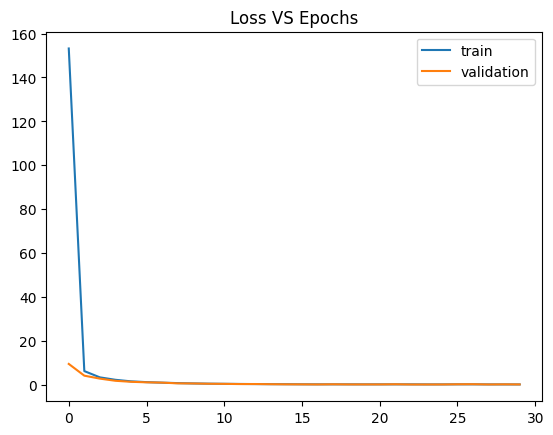

In [154]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



In [157]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


In [156]:
y_pred= model1.predict(x_test)
r2=r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**.5
print("r2score",r2)
print("mse : ",mse)
print("rmse : ",rmse)
print("errors for neural net")
mae = mean_absolute_error(y_test, y_pred)
print("mae : ",mae)


  22/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step
r2score 0.9975187450086815
mse :  0.2129202113397129
rmse :  0.4614327809548352
errors for neural net
mae :  0.3711314066330372


Data Understanding & Preprocessing
Dataset size: 175,777 rows × 19 columns after feature engineering.

No missing values were found in the data.


Converted created_at and actual_delivery_time to datetime.

Derived new time-based features: hour, day, week_number, month.

Calculated delivery_time_taken in minutes.

A LocalOutlierFactor (LOF) model was used to remove outliers, reducing the dataset to 174,984 clean rows.

Exploratory Data Analysis (EDA)
Only 6 unique markets, with market 2 having the highest number of orders.

73 unique store_primary_category, with categories 4, 55, and 46 having the most orders.

Order protocol values are integer-coded, with 1.0 being the most common.

Most common total items per order are 1, 2, and 3 items.

Subtotal distribution shows a high spread (mean ≈ 2697, std ≈ 1828).

A few suspicious or erroneous values observed:

total_onshift_dashers has a negative value (-4).

total_busy_dashers and total_outstanding_orders also have rare negative values or extremely high values.

Peak order times are during late-night/early morning hours (1 AM to 3 AM).

Data spans only two months, with February having more order activity than January.

Average delivery time ≈ 46 minutes.

Modeling
Used a deep neural network (DNN) with:

3 layers (16 → 256 → 1) using ReLU and linear activation.

Optimized with Adam optimizer (learning rate = 0.01).

Model trained with MSE loss, monitored for 30 epochs.

Validation loss improved significantly during early epochs, plateauing around epoch 20.

Model Performance
R² score: 0.9975 (very high, near perfect fit)

MAE: 0.37 minutes

RMSE: 0.46 minutes